In [1]:
#This cell sets everything up, please run this first
#Click on the cells to reveal the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set(style="whitegrid")

# Load the Excel file
file_path = r'TutorialSubjects.xlsx'

# Load the data from the sheet
data = pd.read_excel(file_path, sheet_name='Tutorial Subject Data')

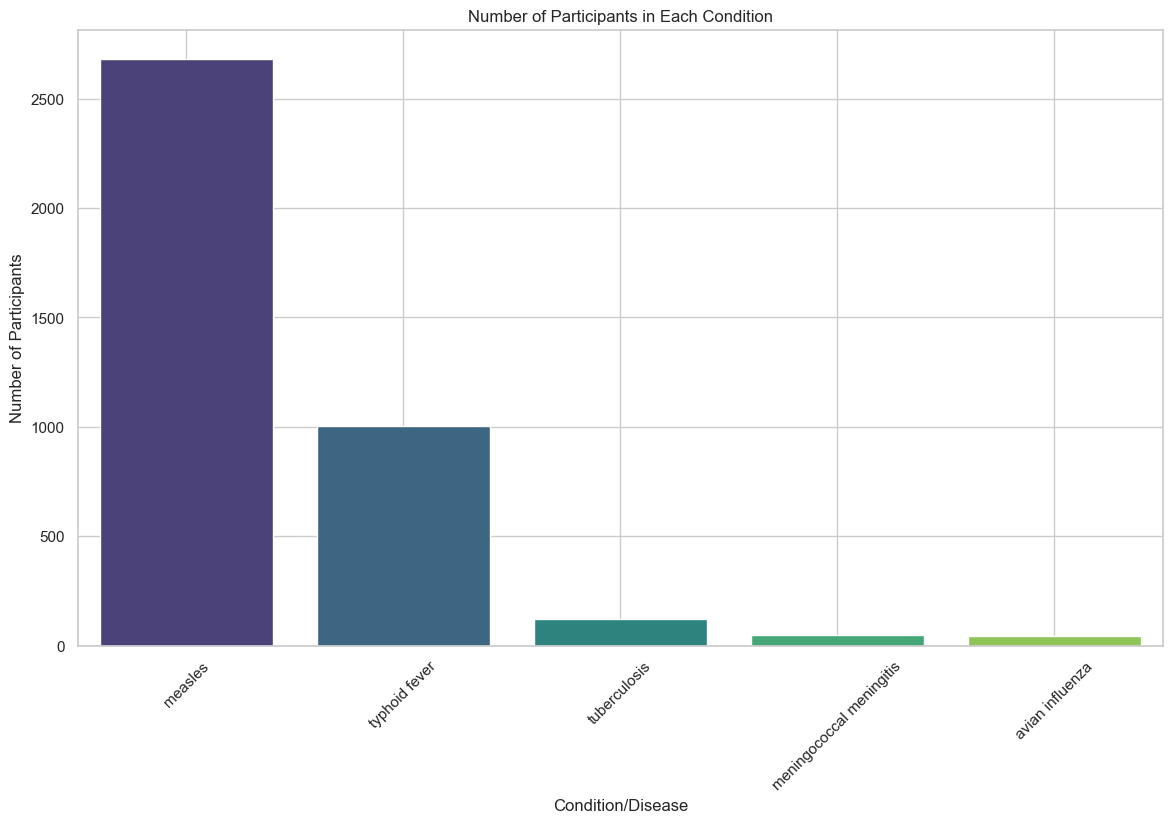

In [2]:
# Number of participants in each condition
plt.figure(figsize=(14, 8))
participants_per_condition = data['condition_or_disease'].value_counts()
sns.barplot(x=participants_per_condition.index, y=participants_per_condition.values, palette="viridis")
plt.title('Number of Participants in Each Condition')
plt.xlabel('Condition/Disease')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

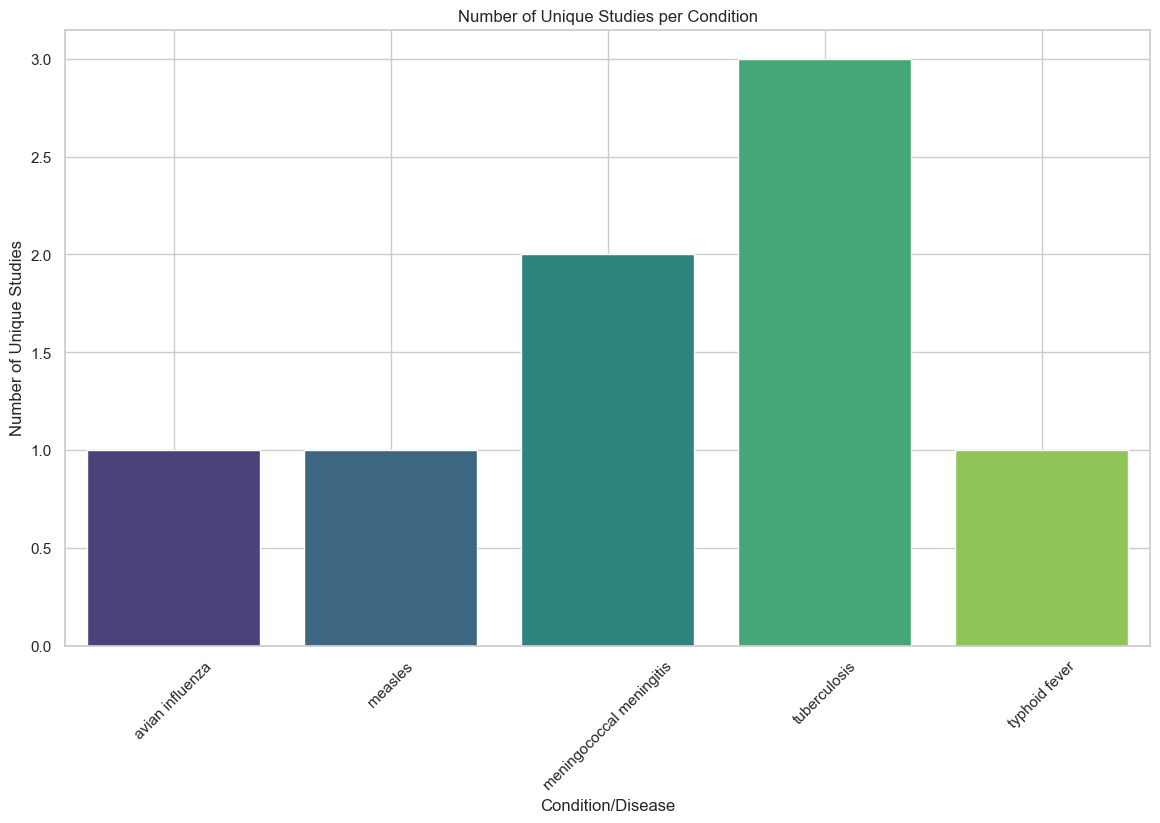

In [3]:
# Number of unique studies per condition
plt.figure(figsize=(14, 8))
unique_studies_per_condition = data.groupby('condition_or_disease')['study_accession'].nunique()
sns.barplot(x=unique_studies_per_condition.index, y=unique_studies_per_condition.values, palette="viridis")
plt.title('Number of Unique Studies per Condition')
plt.xlabel('Condition/Disease')
plt.ylabel('Number of Unique Studies')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

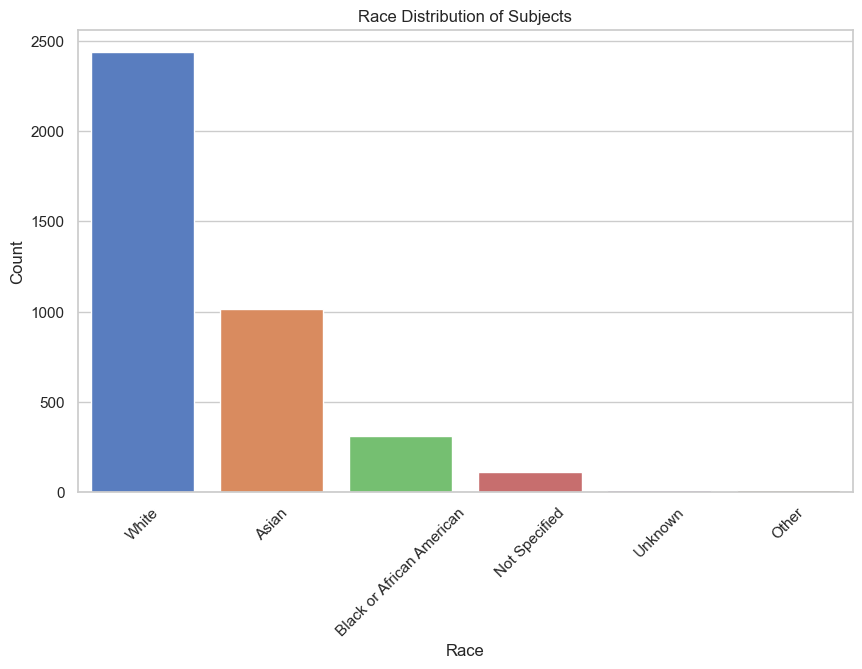

In [4]:
# Race Distribution Bar Plot
race_counts = data['race'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="muted")
plt.title('Race Distribution of Subjects')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

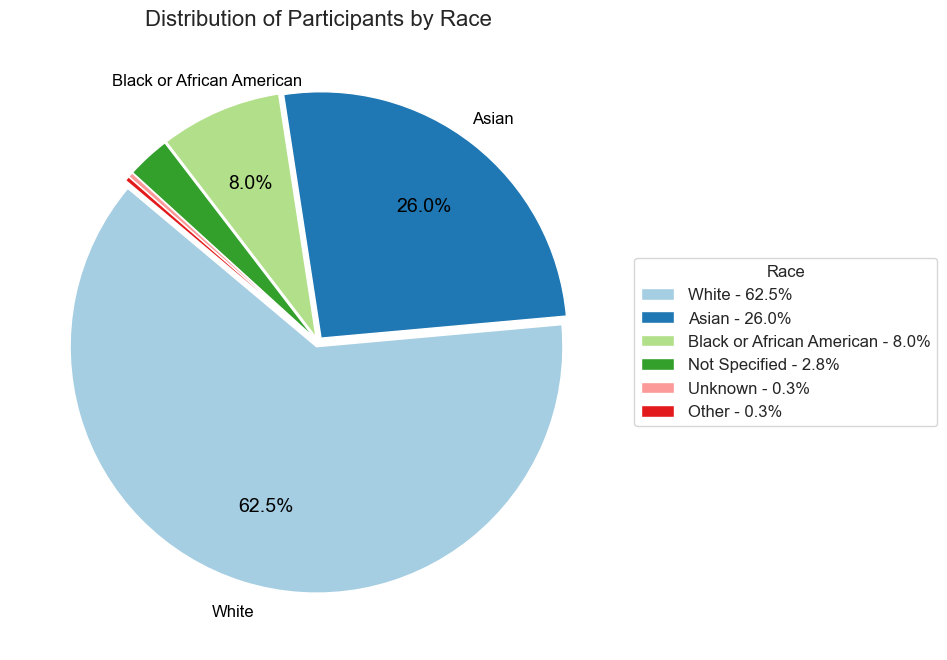

In [5]:
#Race Pie Chart

# Calculate the counts of each race
race_counts = data['race'].value_counts()

# Setting up the pie chart parameters and design
explode = [0.1 if race in ['American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander'] else 0.02 for race in race_counts.index]
colors = plt.cm.Paired(range(len(race_counts)))

# Start plotting the pie chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, _ = ax.pie(race_counts, 
                   startangle=140,
                   colors=colors,
                   explode=explode,
                   textprops=dict(color="w"))

# Adding legend for all races
labels = [f'{race} - {percentage:.1f}%' for race, percentage in zip(race_counts.index, 100. * race_counts / race_counts.sum())]
ax.legend(wedges, labels, title="Race", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Annotations for specific races
for i, p in enumerate(wedges):
    race = race_counts.index[i]
    if race in ['White', 'Asian', 'Black or African American']:
        ang = (p.theta2 - p.theta1) / 2. + p.theta1
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))
        
        # Percent label
        percentage = 100. * race_counts.iloc[i] / race_counts.sum()

        # Calculate external label position
        x_ext = 1.15 * np.cos(np.deg2rad(ang))
        y_ext = 1.15 * np.sin(np.deg2rad(ang))

        # Labels and percentages for specific races
        ax.text(x_ext, y_ext, f'{race}', ha='center', va='center', fontsize=12, color='black')
        ax.text(x * 0.7, y * 0.7, f'{percentage:.1f}%', ha='center', va='center', fontsize=14, color='black')

# Title for the chart
ax.set_title('Distribution of Participants by Race', fontsize=16)

plt.show()

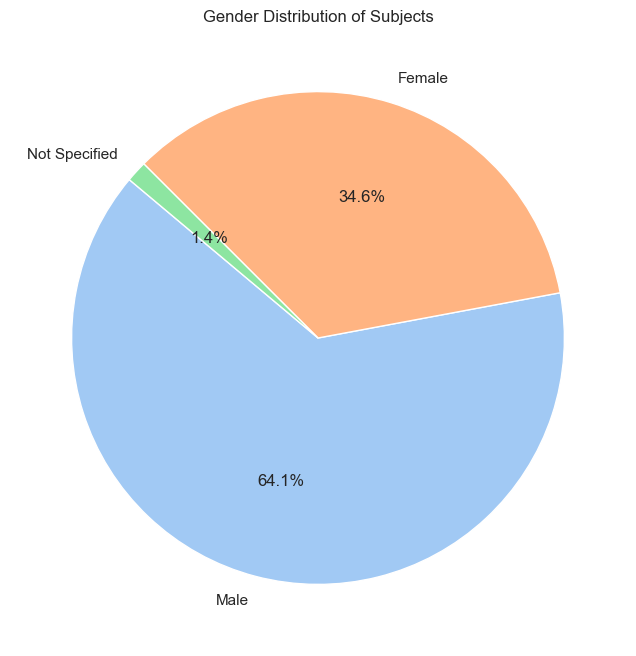

In [6]:
#  Gender Distribution Pie Chart
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Gender Distribution of Subjects')
plt.show()


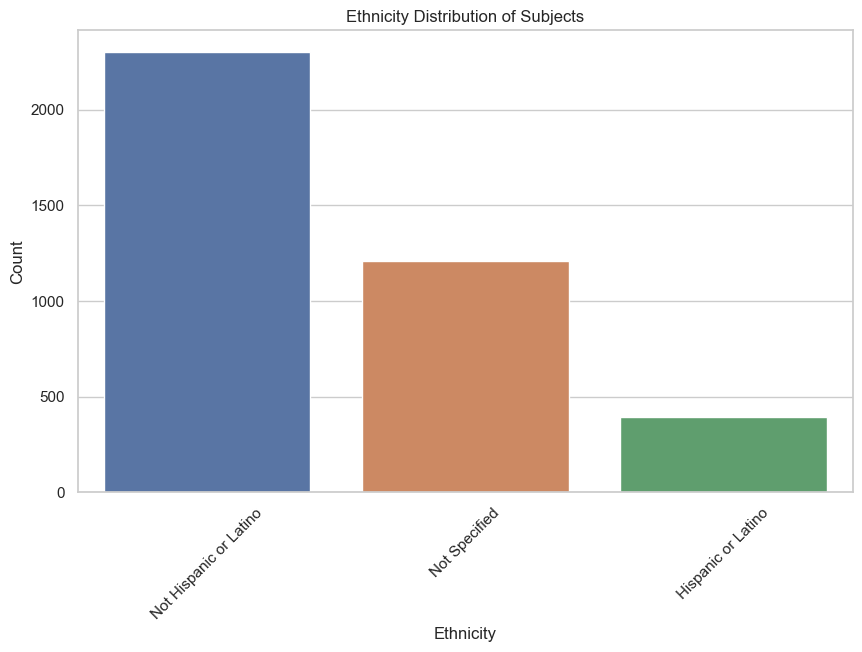

In [7]:
#Ethnicity Distribution Bar Plot
ethnicity_counts = data['ethnicity'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, palette="deep")
plt.title('Ethnicity Distribution of Subjects')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

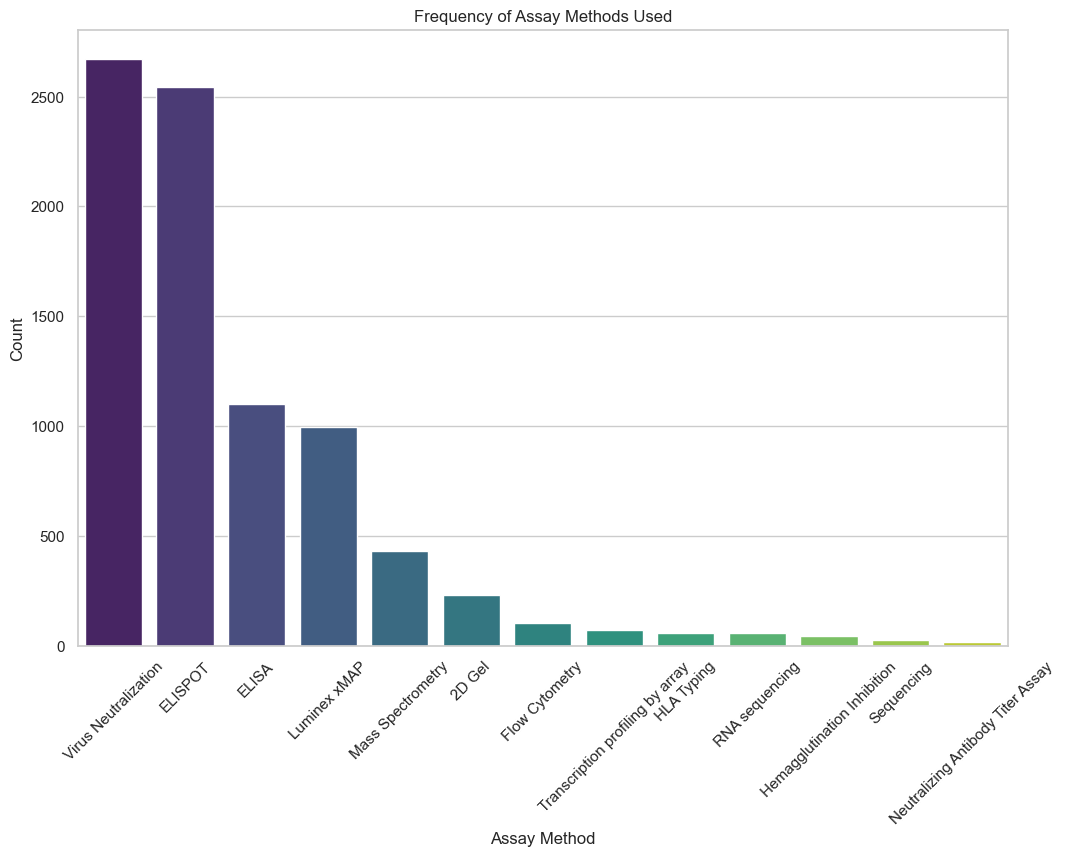

In [8]:
#  Assay Methods Bar Plot
assay_methods = data['assay_method'].str.split(';').explode()
assay_method_counts = assay_methods.value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=assay_method_counts.index, y=assay_method_counts.values, palette="viridis")
plt.title('Frequency of Assay Methods Used')
plt.xlabel('Assay Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

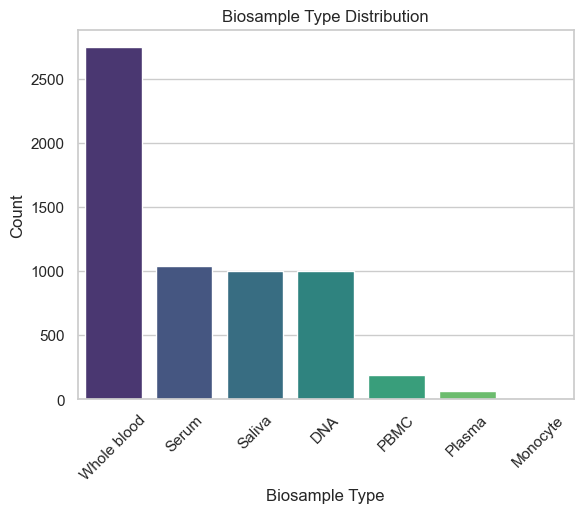

In [9]:
# Biosample Types  Bar Plot
biot = data['biosample_type'].str.split(';').explode()
biot_counts = biot.value_counts()
sns.barplot(x=biot_counts.index, y=biot_counts.values, palette="viridis")
plt.title('Biosample Type Distribution')
plt.xlabel('Biosample Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


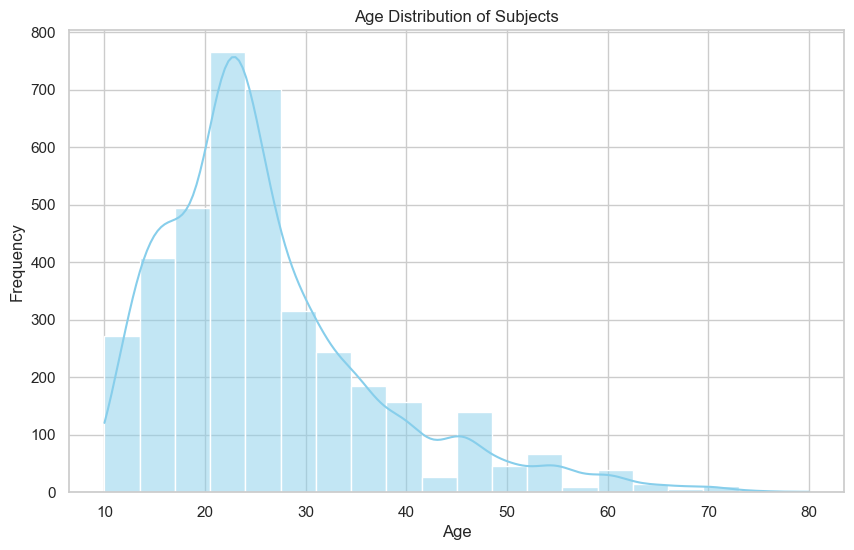

In [10]:
#  Age Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['max_age'], kde=True, bins=20, color="skyblue")
plt.title('Age Distribution of Subjects')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

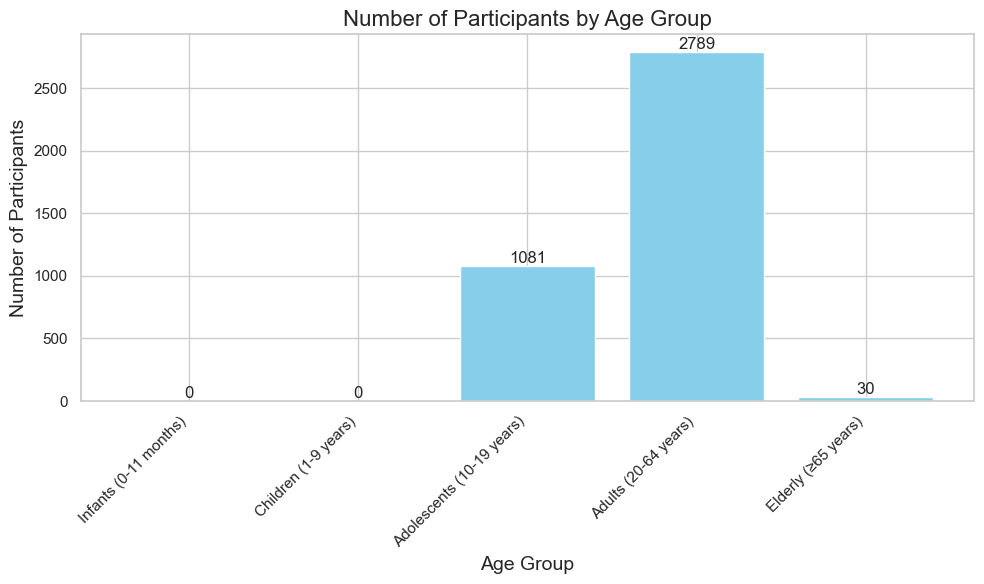

In [11]:
# Custom Age Groups Plot For EX
bins = [0, 1, 10, 20, 65, float('inf')]
labels = ['Infants (0-11 months)', 'Children (1-9 years)', 'Adolescents (10-19 years)', 'Adults (20-64 years)', 'Elderly (≥65 years)']

# Categorize the ages
data['Age Group'] = pd.cut(data['min_age'], bins=bins, labels=labels, right=False)

# Calculate the counts of each age group
age_group_counts = data['Age Group'].value_counts().reindex(labels)

# Create a bar graph with the number of participants for each age group
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')

# Add labels and title to the bar graph
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Participants', fontsize=14)
plt.title('Number of Participants by Age Group', fontsize=16)

# Add text labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

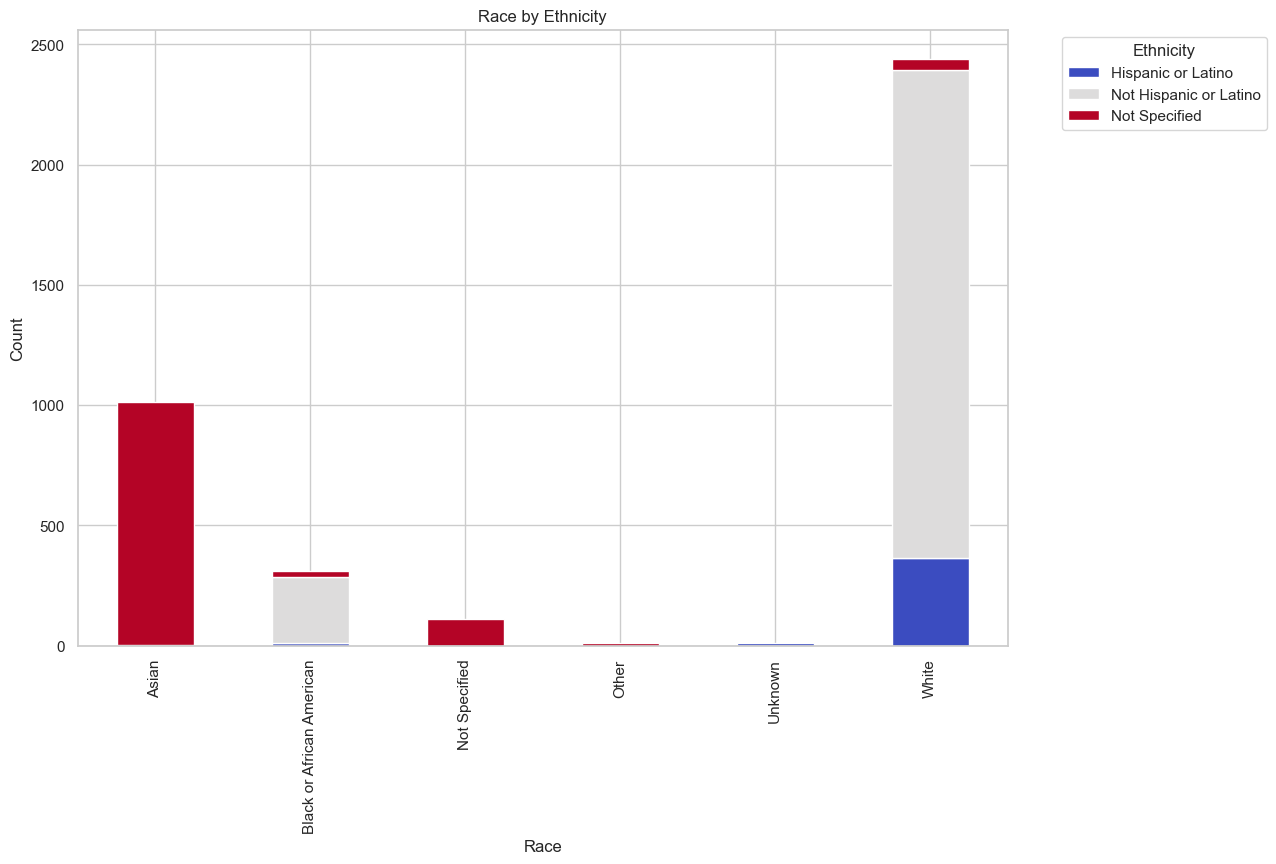

<Figure size 1200x800 with 0 Axes>

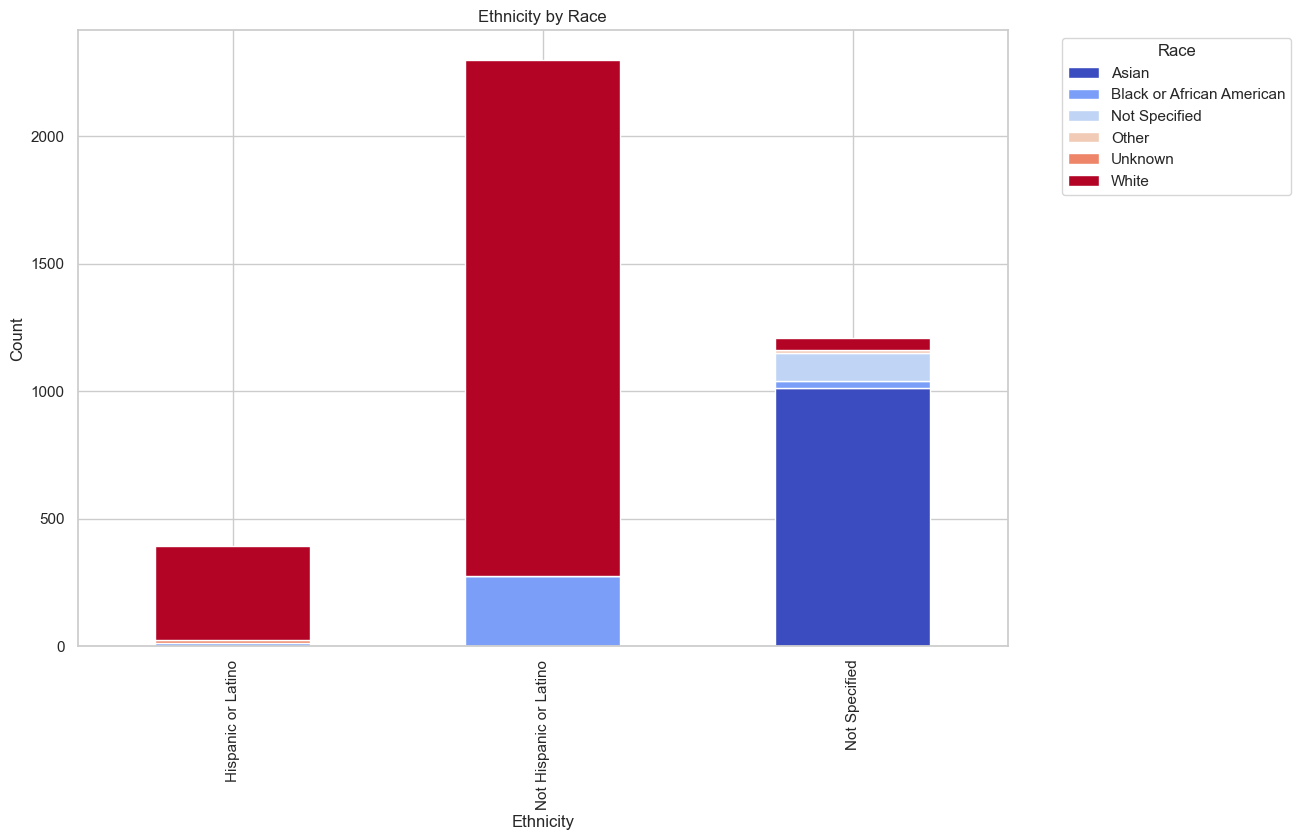

In [12]:
# Race by Ethnicity and Vise Versa
plt.figure(figsize=(12, 8))
race_ethnicity_counts = pd.crosstab(data['race'], data['ethnicity'])
race_ethnicity_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Race by Ethnicity')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 9.1. Ethnicity by Race
plt.figure(figsize=(12, 8))
race_ethnicity_counts = pd.crosstab(data['ethnicity'], data['race'])
race_ethnicity_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title('Ethnicity by Race')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


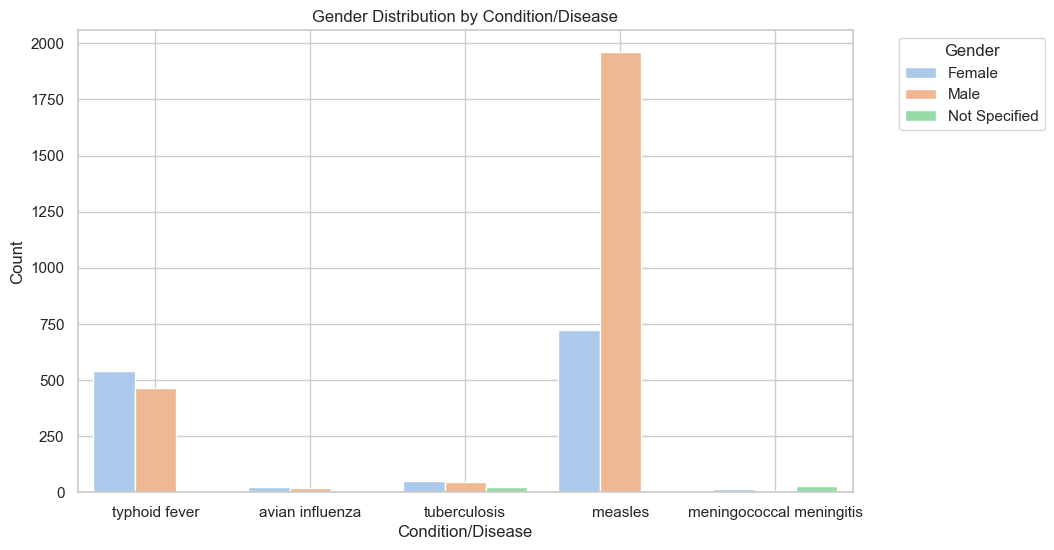

<Figure size 1000x600 with 0 Axes>

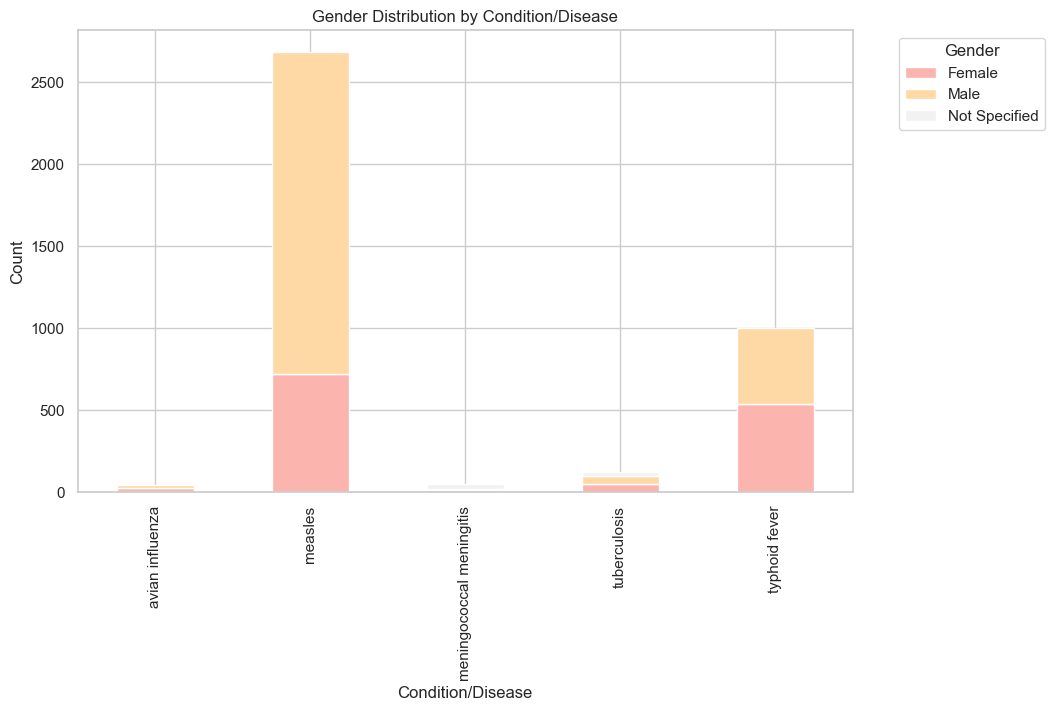

In [13]:
# Gender by Condition/Disease two types
plt.figure(figsize=(10, 6))
sns.countplot(x='condition_or_disease', hue='gender', data=data, palette="pastel")
plt.title('Gender Distribution by Condition/Disease')
plt.xlabel('Condition/Disease')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 11. Gender by Condition/Disease (stacked bar plot)
plt.figure(figsize=(10, 6))
condition_gender_counts = pd.crosstab(data['condition_or_disease'], data['gender'])
condition_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('Gender Distribution by Condition/Disease')
plt.xlabel('Condition/Disease')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

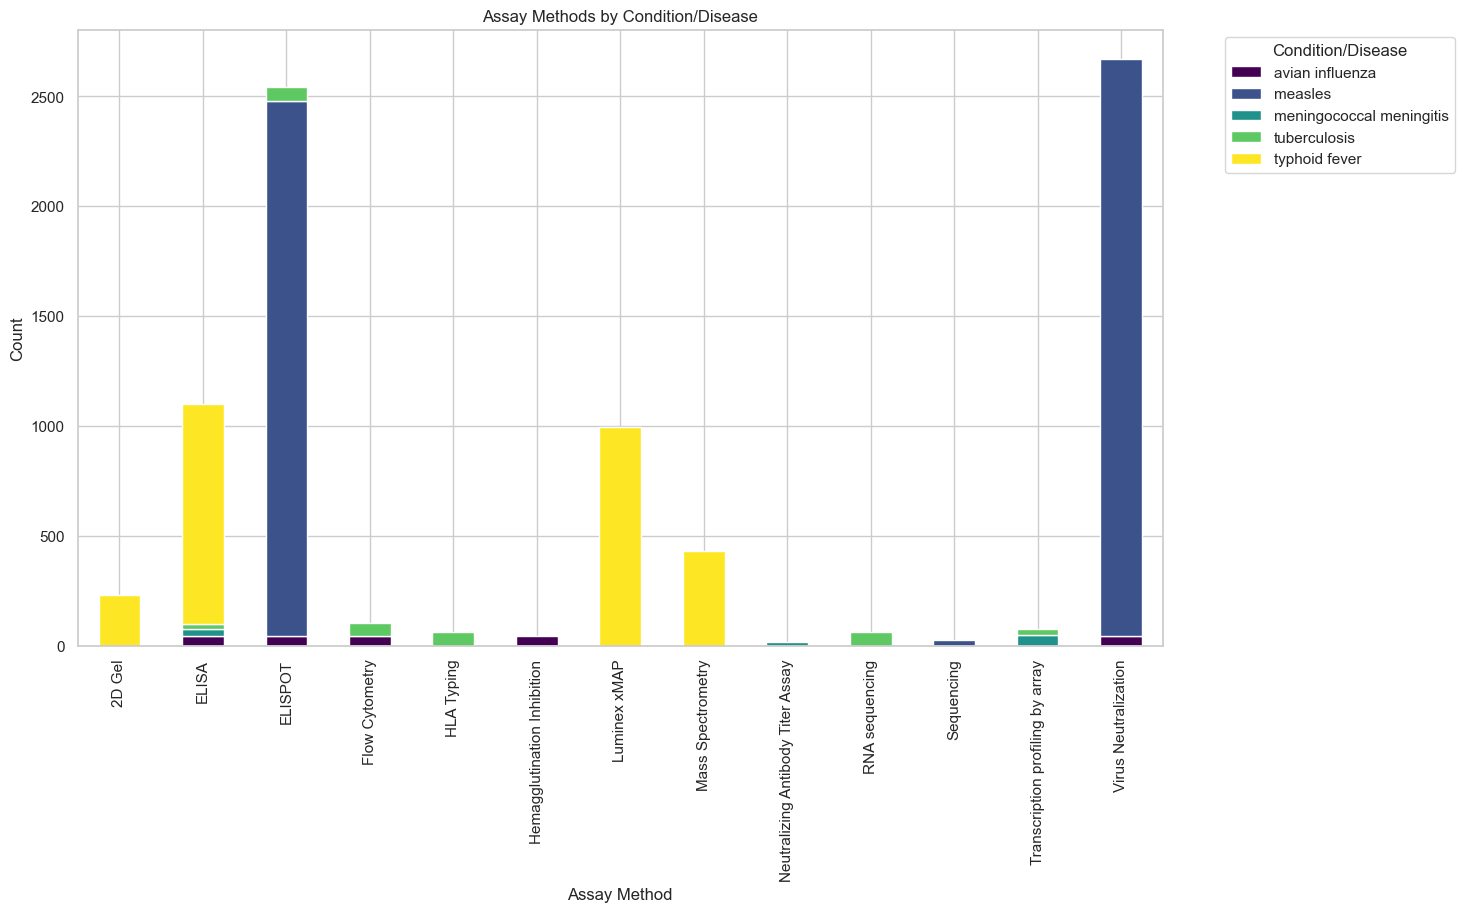

In [14]:
#Assay Methods by Condition/Disease

# Split the assay methods by semicolon and explode the list to separate each method
exploded_data = data.assign(assay_method=data['assay_method'].str.split(';')).explode('assay_method')

# 8. Assay Methods by Condition/Disease (stacked bar plot)
plt.figure(figsize=(14, 8))
assay_condition_counts = pd.crosstab(exploded_data['assay_method'], exploded_data['condition_or_disease'])
assay_condition_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Assay Methods by Condition/Disease')
plt.xlabel('Assay Method')
plt.ylabel('Count')
plt.legend(title='Condition/Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

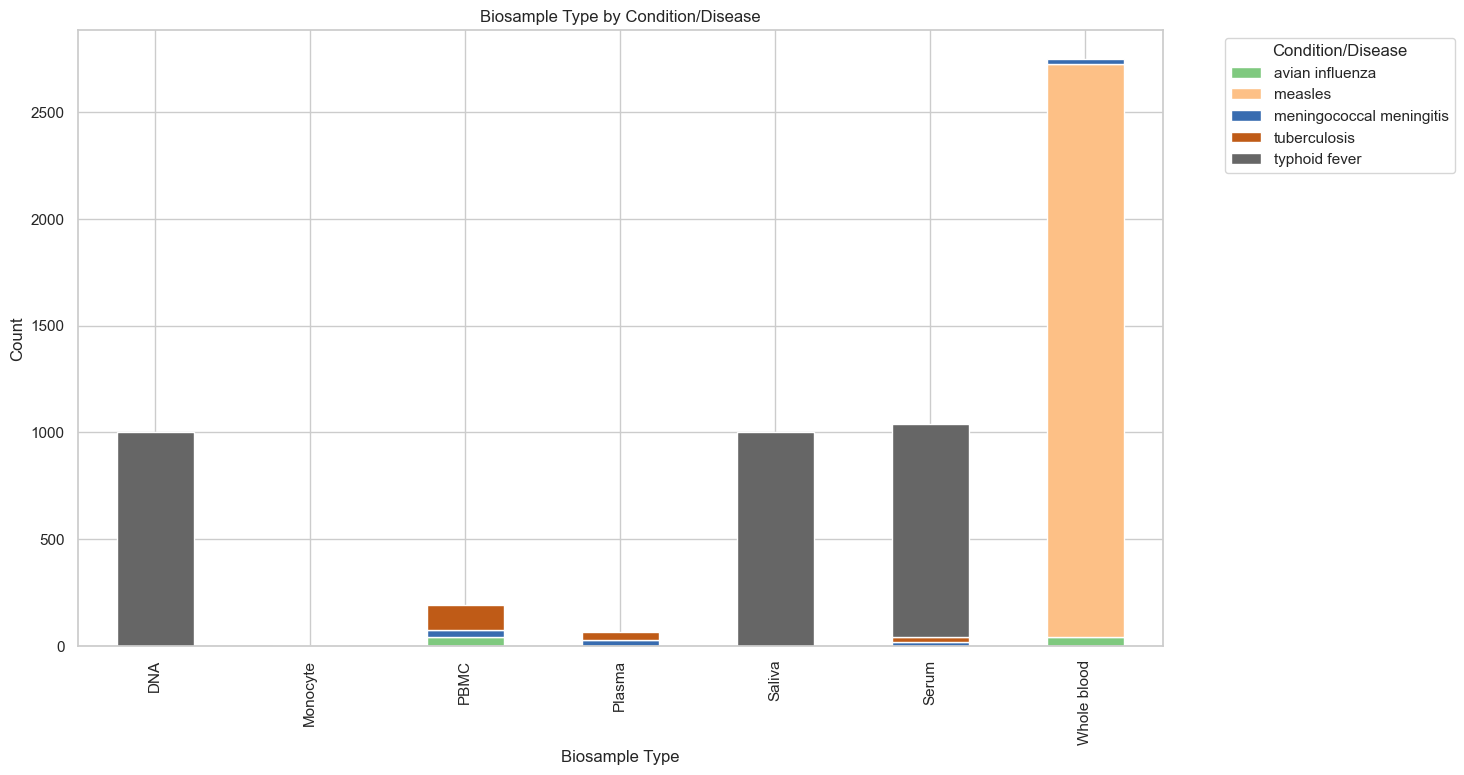

In [15]:
#Biosample Type by Condition/Disease

# Split the biosample types by semicolon and explode the list to separate each type
exploded_data_biosample = data.assign(biosample_type=data['biosample_type'].str.split(';')).explode('biosample_type')

# Biosample Type by Condition/Disease (stacked bar plot)
plt.figure(figsize=(14, 8))
biosample_condition_counts = pd.crosstab(exploded_data_biosample['biosample_type'], exploded_data_biosample['condition_or_disease'])
biosample_condition_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Accent')
plt.title('Biosample Type by Condition/Disease')
plt.xlabel('Biosample Type')
plt.ylabel('Count')
plt.legend(title='Condition/Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

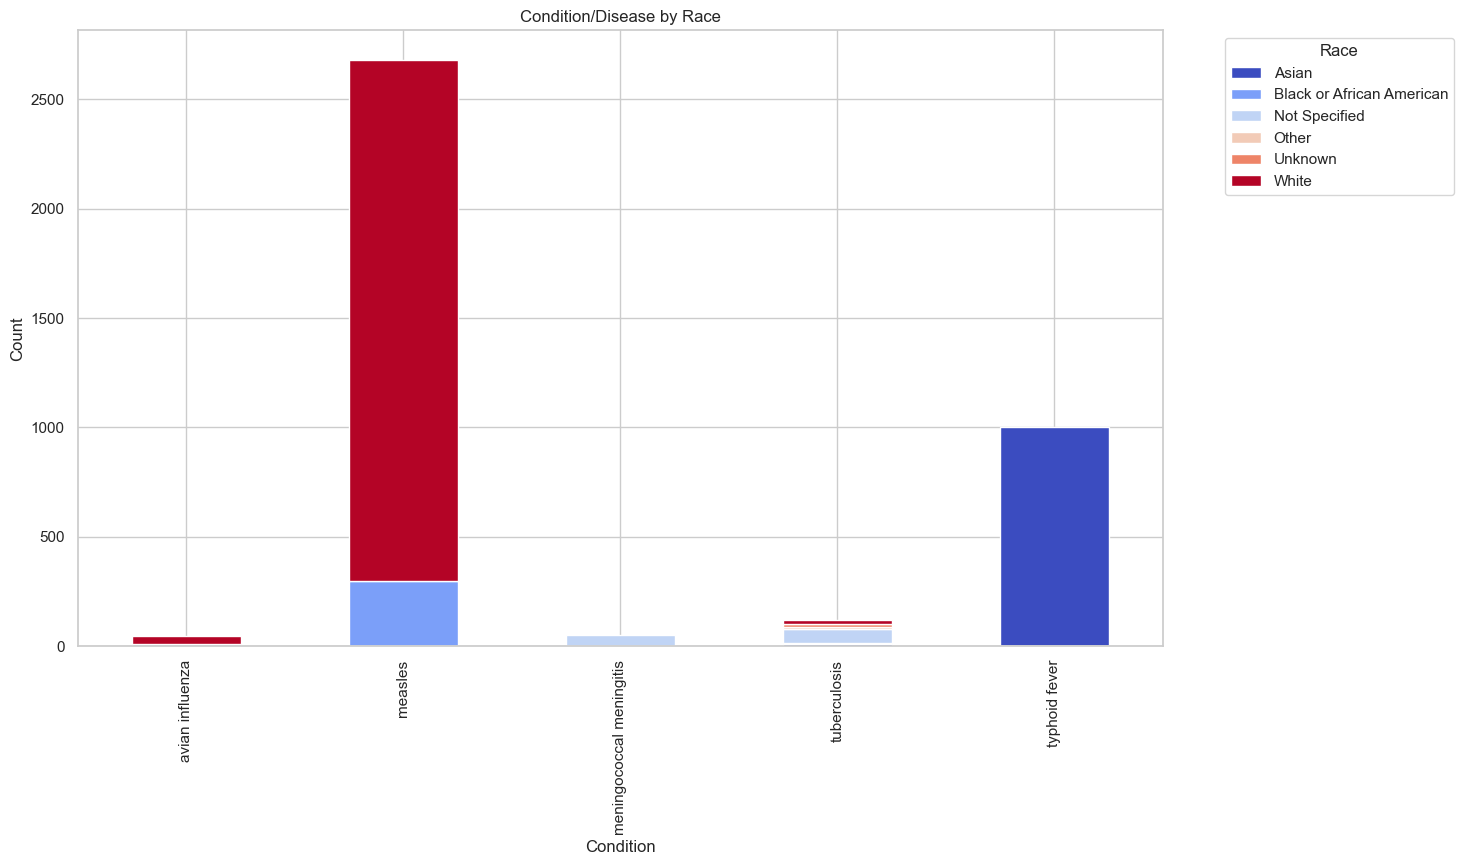

In [16]:
# Race by Condition (stacked bar plot)
plt.figure(figsize=(14, 8))
condracec = pd.crosstab(data['condition_or_disease'], data['race'])
condracec.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.title('Condition/Disease by Race')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

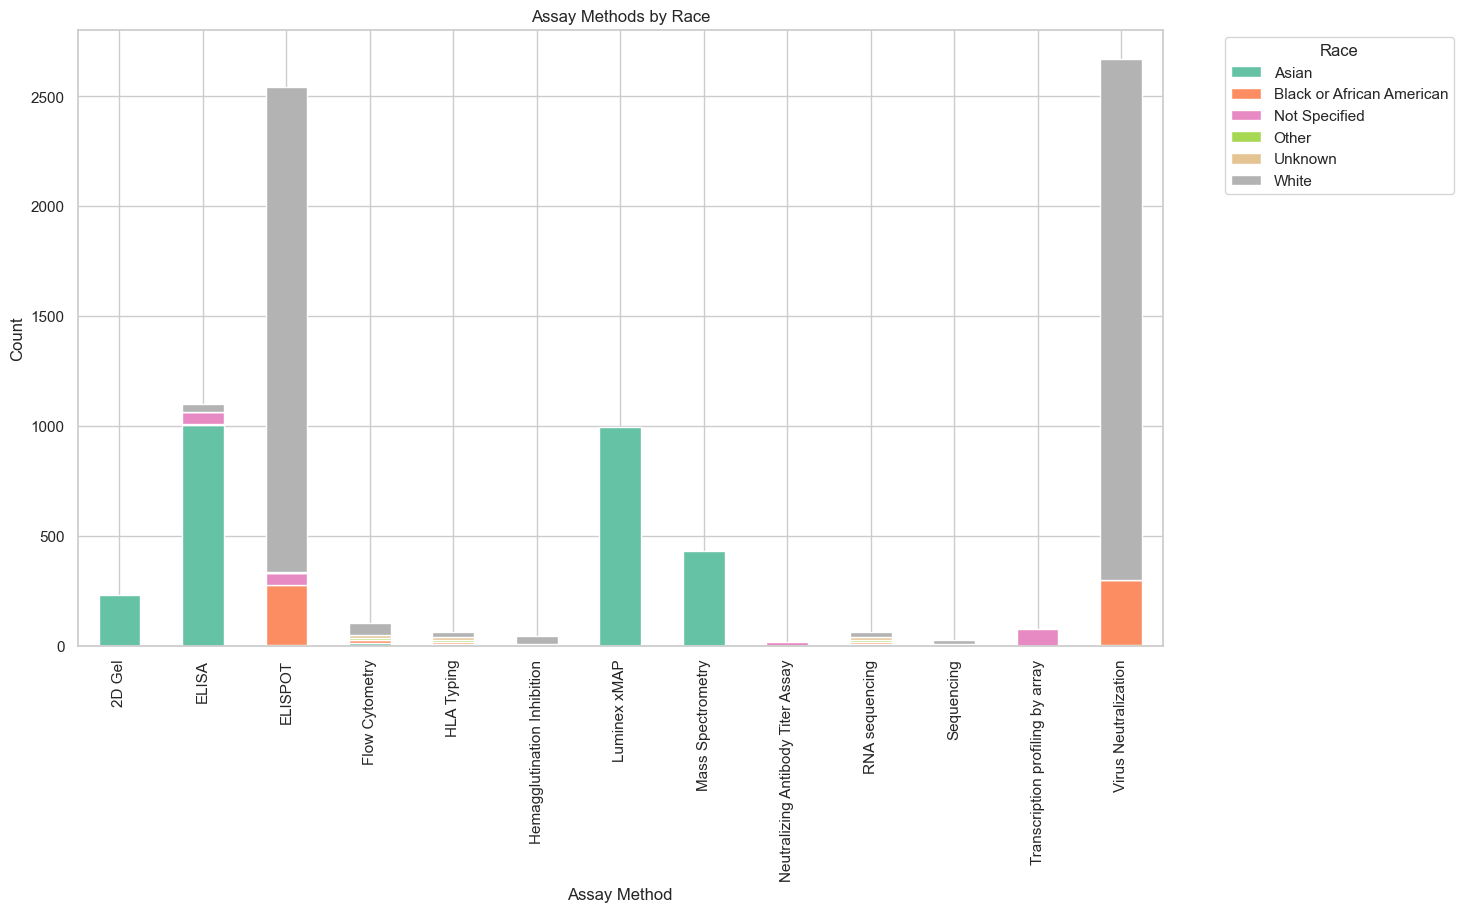

In [17]:
# Assay Methods by Race (stacked bar plot)

# Split the assay methods by semicolon and explode the list to separate each method
exploded_data = data.assign(assay_method=data['assay_method'].str.split(';')).explode('assay_method')

plt.figure(figsize=(14, 8))
assay_race_counts = pd.crosstab(exploded_data['assay_method'], exploded_data['race'])
assay_race_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Assay Methods by Race')
plt.xlabel('Assay Method')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

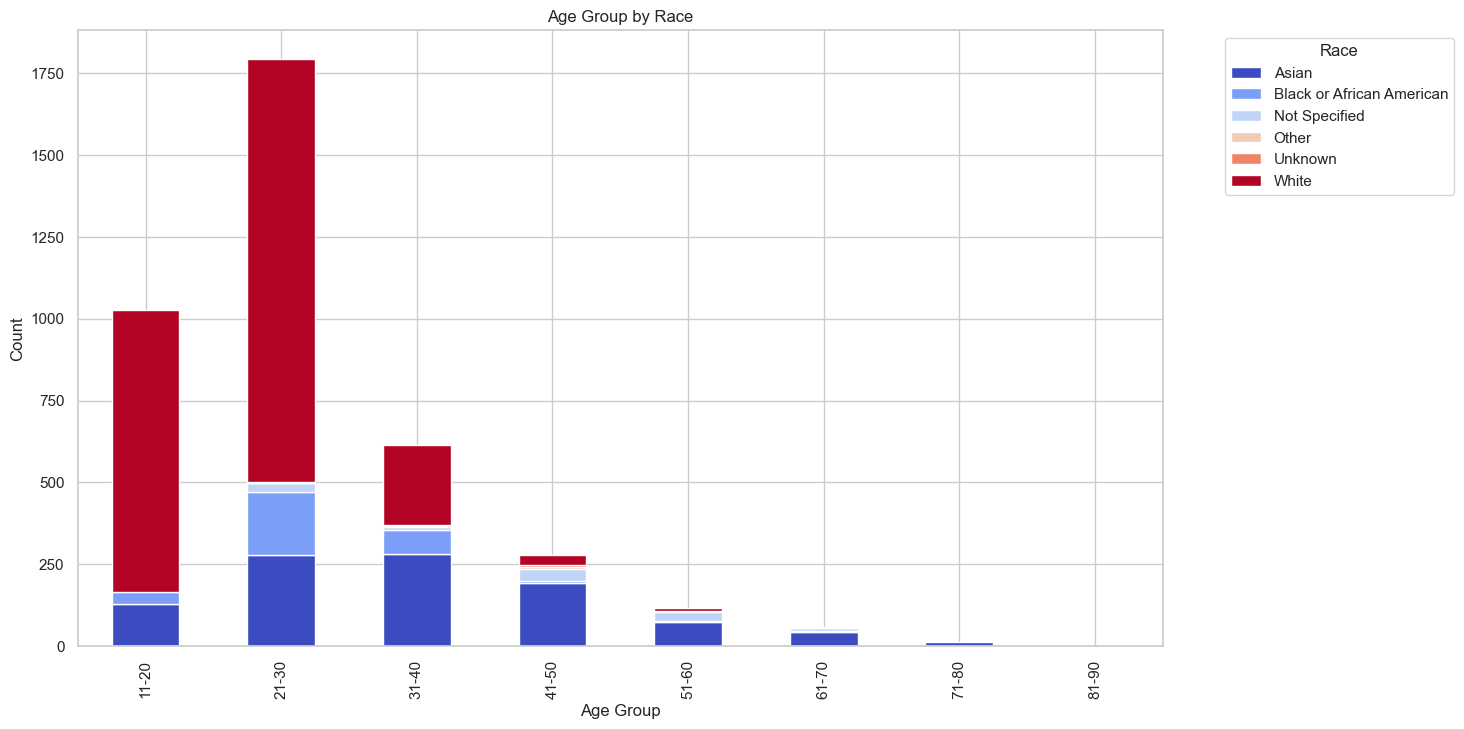

<Figure size 1400x800 with 0 Axes>

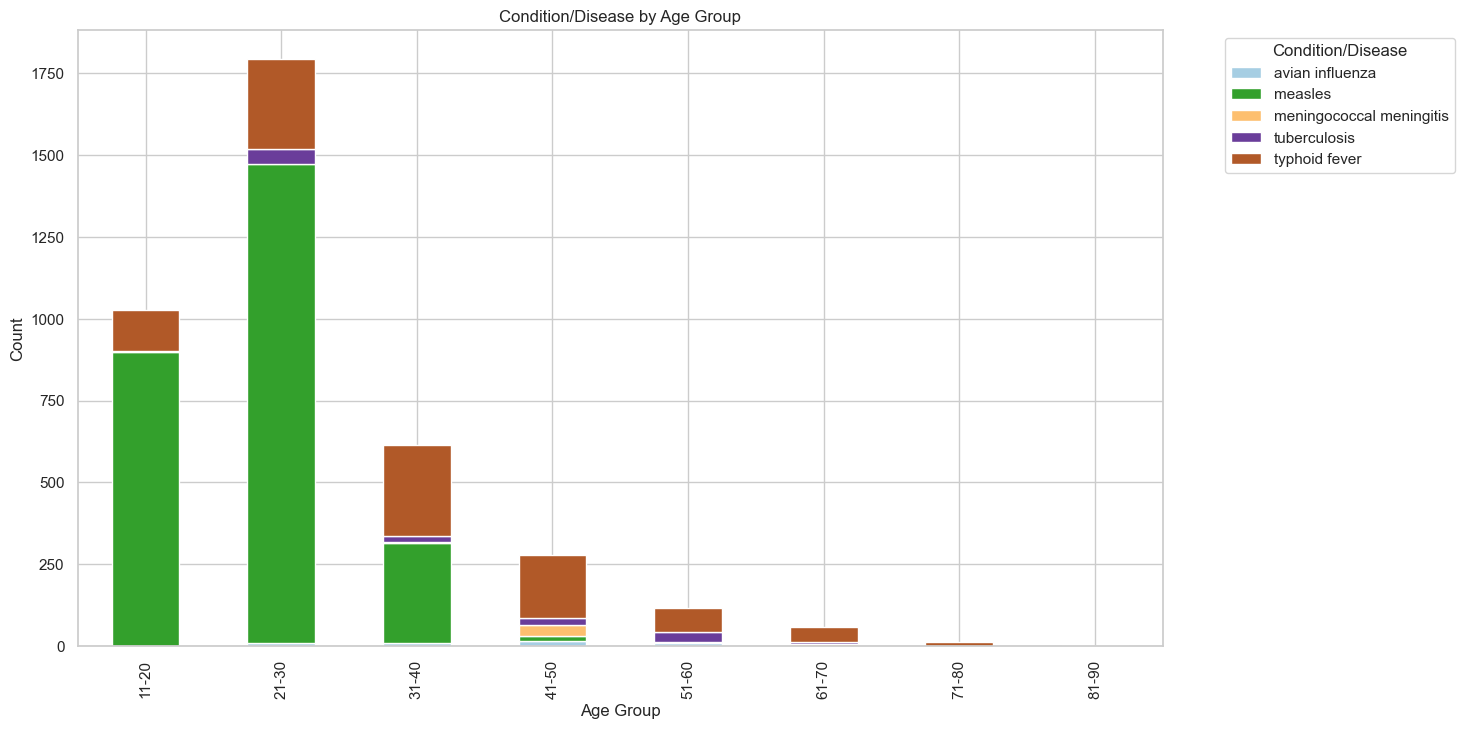

In [18]:
#Race By Age group and Condition/Disease by Age

# Ensure age groups are correctly created
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['age_group'] = pd.cut(data['max_age'], bins=bins, labels=labels, right=False)

# Age Group by Race (stacked bar plot)
plt.figure(figsize=(14, 8))
age_race_counts = pd.crosstab(data['age_group'], data['race'])
age_race_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.title('Age Group by Race')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# Condition/Disease by Age Group (stacked bar plot)
plt.figure(figsize=(14, 8))
condition_age_counts = pd.crosstab(data['age_group'], data['condition_or_disease'])
condition_age_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Paired')
plt.title('Condition/Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Condition/Disease', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [19]:
#CODE NEEDED FOR FINAL 2 FIGURES RUN IF RUNNING FINAL CELLS
condition_participant_counts = {}
condition_study_counts = {}
clinical_trial_participants = {}

for index, row in data.iterrows():
    condition = str(row['condition_or_disease']).lower()  # Normalize condition names
    study_accession = str(row['study_accession'])
    race = str(row['race'])
     # Split multiple conditions if they are in the same cell
    conditions_list = [cond.strip() for cond in condition.split(';')]
  #  if methods == 'nan' or condition == 'nan':
        #    continue
    for cond in conditions_list:
        cond = cond.strip()
        
        # Count participants
        if cond in condition_participant_counts:
            condition_participant_counts[cond] += 1
        else:
            condition_participant_counts[cond] = 1
            
        # Count unique studies using a set
        if cond not in condition_study_counts:
            condition_study_counts[cond] = set()
        if study_accession != 'nan':
            condition_study_counts[cond].add(study_accession)
     # Count participants in clinical trials per condition
        if row['clinical_trial'] == 'Y':
            if cond in clinical_trial_participants:
                clinical_trial_participants[cond] += 1
            else:
                clinical_trial_participants[cond] = 1   
                


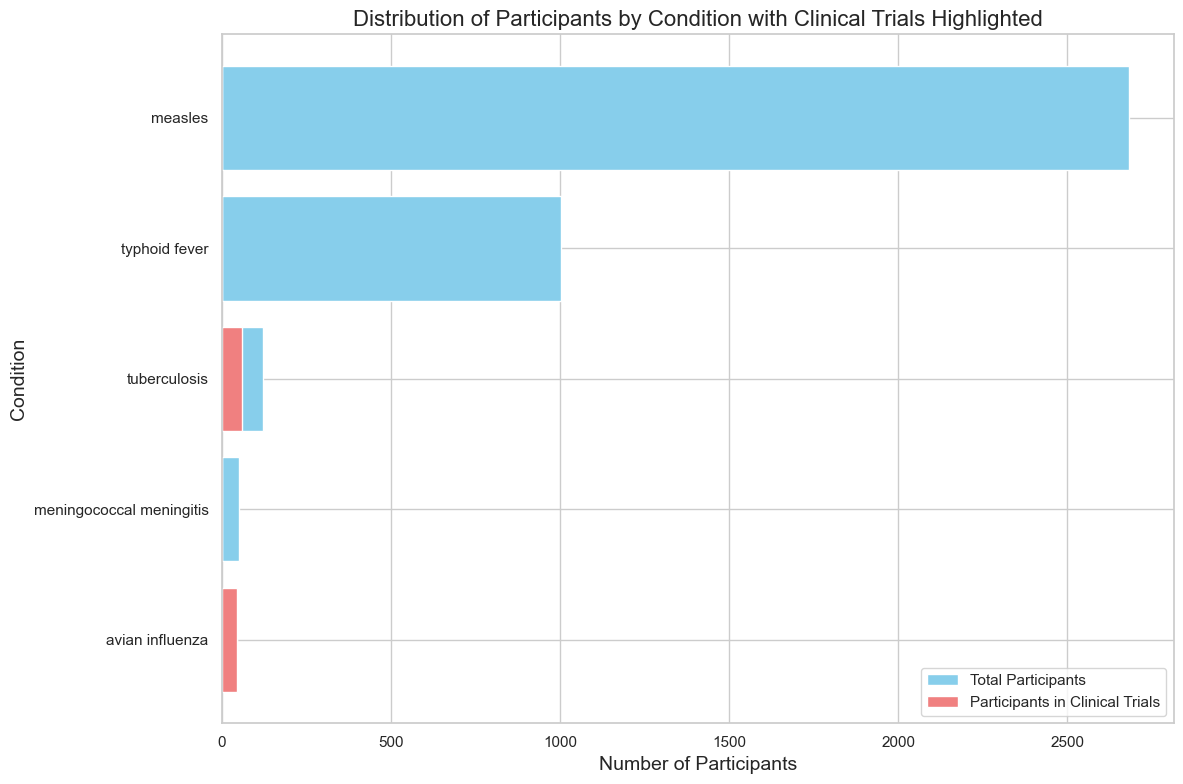

In [20]:
#Participants by Clinical Trial Involvement
# Prepare the data for plotting
conditions = list(condition_participant_counts.keys())
conditions.sort(key=lambda x: condition_participant_counts[x], reverse=True)  # Sort by total participants descending

total_counts = [condition_participant_counts[cond] for cond in conditions]
trial_counts = [clinical_trial_participants.get(cond, 0) for cond in conditions]

# Plotting the bar graph
plt.figure(figsize=(12, 8))

# Plot the total participants
bars_total = plt.barh(conditions, total_counts, color='skyblue', label='Total Participants')

# Plot the participants in clinical trials (stacked on the same bars)
bars_clinical = plt.barh(conditions, trial_counts, color='lightcoral', label='Participants in Clinical Trials')

plt.xlabel('Number of Participants', fontsize=14)
plt.ylabel('Condition', fontsize=14)
plt.title('Distribution of Participants by Condition with Clinical Trials Highlighted', fontsize=16)
plt.legend()

plt.gca().invert_yaxis()  # Invert the y-axis to have the largest bar at the top
plt.tight_layout()
#plt.savefig(r'C:/Users/yusuf/Box/ImmPort- Pan Vaccine Response Project/2024 Summer UCSF/Jupityr/Tutorial/TutorialFigures/ParticipantsClinicalTrials.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

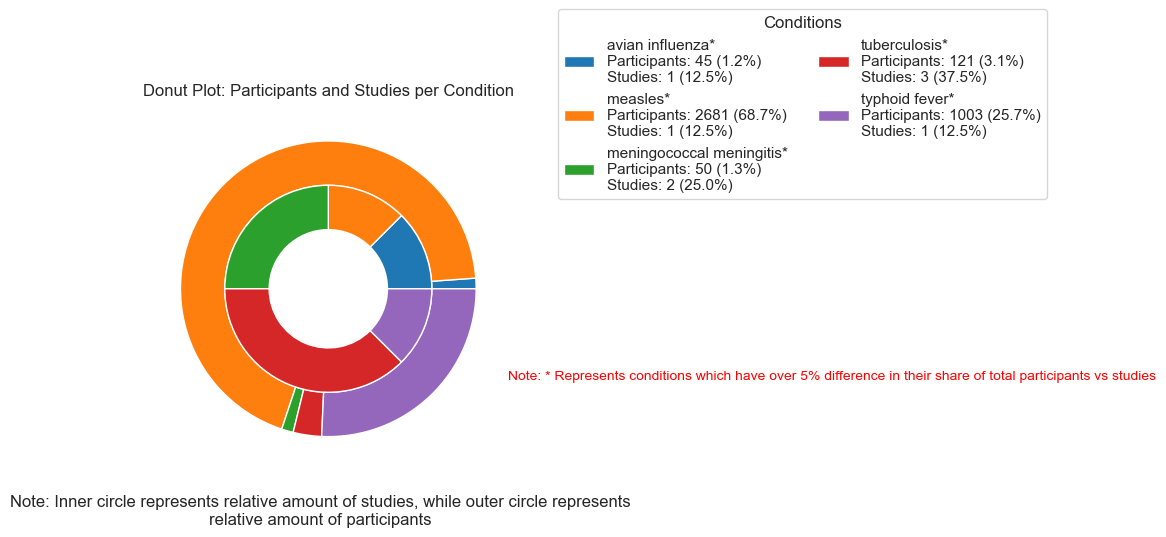

In [21]:
#Donut Plot Studies vs Participants
# Prepare the data for plotting
labels = sorted(set(condition_participant_counts.keys()).union(condition_study_counts.keys()))
participant_counts = [condition_participant_counts.get(label, 0) for label in labels]
unique_study_counts = [len(condition_study_counts.get(label, set())) for label in labels]


# Calculate total participants and total studies
total_participants = sum(participant_counts)
total_studies = sum(unique_study_counts)

# Calculate the percentage of total participants and total studies for each condition
percent_participants = [100 * p / total_participants for p in participant_counts]
percent_studies = [100 * s / total_studies for s in unique_study_counts]

# Calculate the absolute percentage differences between these two percentages for each condition
percentage_differences = [abs(p - s) for p, s in zip(percent_participants, percent_studies)]

fig, ax = plt.subplots()

# Manually set color map for conditions
color_map = {
    'avian influenza': '#1f77b4',  # Blue
    'measles': '#ff7f0e',         # Orange
    'meningococcal meningitis': '#2ca02c',  # Green
    'tuberculosis': '#d62728',    # Red
    'typhoid fever': '#9467bd'    # Purple
}

# Ensure the colors are ordered according to the labels
colors = [color_map[label] for label in labels]

# Outer ring: Number of Participants
size = 0.3
vals = participant_counts
wedges1, texts1 = ax.pie(vals, radius=1, colors=colors, wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.85)

# Inner ring: Number of Studies
vals = unique_study_counts
wedges2, texts2 = ax.pie(vals, radius=1-size, colors=colors, wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.70)

# Combine wedges from both pies for a single legend
wedges = wedges1 + wedges2

highlight_threshold = 5  # Threshold for highlighting, e.g., 5% difference
highlighted_labels = [
    f'{label}{"*" if diff > highlight_threshold else ""}\nParticipants: {p} ({pp:.1f}%)\nStudies: {s} ({ps:.1f}%)'
    for label, p, s, pp, ps, diff in zip(labels, participant_counts, unique_study_counts, percent_participants, percent_studies, percentage_differences)
]

# Legend with highlighted conditions
ax.legend(wedges, highlighted_labels, title="Conditions", loc="center left", bbox_to_anchor=(1.1, 0.5, 0.5, 1), ncol=2)

plt.figtext(0.5, 0.01, "Note: Inner circle represents relative amount of studies, while outer circle represents relative amount of participants", wrap=True, horizontalalignment='center', fontsize=12)
fig.text(1.3, 0.3, "Note: * Represents conditions which have over 5% difference in their share of total participants vs studies", ha='center', va='bottom', fontsize=10, color='red')

# Set aspect and title
ax.set(aspect="equal", title='Donut Plot: Participants and Studies per Condition')
#plt.savefig(r'C:/Users/yusuf/Box/ImmPort- Pan Vaccine Response Project/2024 Summer UCSF/Jupityr/Tutorial/TutorialFigures/DonutSubStud.png', format='png', dpi=300, bbox_inches='tight')
plt.show()